# Capstone Project: Análisis de Datos - Mg. DS UDD
## Modelo Forecasting autoregresivo del indicador de uptime de red con variables exógenas ( lluvia y temperatura)
### Javier Vega - Vicente Gallardo

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Este proyecto aborda un análisis del estado del servicio móvil(UPTIME) otorgado por una operadora en particular, este se ve afectado por un sin fin de razones, tanto endógenas como exógenas. De estas, muchas aún no han sido exploradas como es el caso de lluvia y temperatura, por lo que este trabajo en primera instancia se centrará en el análisis del indicador y su relación con las variables mencionadas, todo con miras a poder desarrollar un modelo predictivo o forecasting autoregresivo utilizando como método RandomForest.

Primero se carga la base de lluvias obtenidas de la Dirección Meteorológica de Chile de las estaciones: El Paico, La Reina (Eulogio Sánchez), Pudahuel, Quinta Normal y San José. Estas fueron consolidadas en un archivo xlsx, que contiene cuántos mm de lluvia precipitaron cada día.

Obs: Las bases no pudieron ser trabajadas directamente debido al formato en el cual venian.

In [3]:
df_llu=pd.read_excel("C:/Users/javie/Universidad/Trimestre 2/Analisis de datos/Capstone Project/Raw-DGAC-Lluvia/Consolidado_lluvia.xlsx")
df_llu.head(10)

,Fecha,E. El Paico,E. Eulogio Sanchez,E. Pudahuel,E. Quinta Normal,E. San Jose
0,2022-01-01,s/p,s/p,s/p,s/p,s/p
1,2022-01-02,s/p,s/p,s/p,s/p,s/p
2,2022-01-03,s/p,s/p,s/p,s/p,s/p
3,2022-01-04,s/p,s/p,s/p,s/p,s/p
4,2022-01-05,s/p,s/p,s/p,s/p,s/p
5,2022-01-06,s/p,s/p,s/p,s/p,s/p
6,2022-01-07,s/p,s/p,s/p,s/p,s/p
7,2022-01-08,s/p,s/p,s/p,s/p,s/p
8,2022-01-09,s/p,s/p,s/p,s/p,s/p
9,2022-01-10,s/p,s/p,s/p,s/p,s/p


Estos datos no vienen en un formato adecuado, por lo que es necesario trabajarlos realizando tanto limpieza como adecuación de dataseet. En primera instancia se procede a cambiar aquellos datos nulos 's/p' por 0 para que se puedan ser trabajados de forma numérica.

In [4]:
df_llu=df_llu.replace(['s/p'],0)
df_llu.head(10)

,Fecha,E. El Paico,E. Eulogio Sanchez,E. Pudahuel,E. Quinta Normal,E. San Jose
0,2022-01-01,0,0,0,0,0
1,2022-01-02,0,0,0,0,0
2,2022-01-03,0,0,0,0,0
3,2022-01-04,0,0,0,0,0
4,2022-01-05,0,0,0,0,0
5,2022-01-06,0,0,0,0,0
6,2022-01-07,0,0,0,0,0
7,2022-01-08,0,0,0,0,0
8,2022-01-09,0,0,0,0,0
9,2022-01-10,0,0,0,0,0


Luego que ya no exiten valores de texto se ejecuta la función 'describe' para poder chequear que las fechas esten correctas y ver datos estadísticos sobre este dataset.

In [9]:
df_llu.describe()


C:\Users\javie\AppData\Local\Temp\ipykernel_30588\291364946.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_llu.describe()


,Fecha,E. El Paico,E. Eulogio Sanchez,E. Pudahuel,E. Quinta Normal,E. San Jose
count,273,273.0,273.0,273.0,273.0,273.0
unique,273,15.0,23.0,21.0,24.0,24.0
top,2022-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0
freq,1,172.0,246.0,233.0,240.0,224.0
first,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2022-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN


Podemos ver que existen 273 valores en el dataset, 273 fechas únicas, y diferentes valores únicos de mm de lluvia para cada estación. También podemos observar que existen registros nulos para determinadas fechas en algunas estaciones.

In [10]:
df_llu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Fecha               273 non-null    datetime64[ns]
 1   E. El Paico         273 non-null    object        
 2   E. Eulogio Sanchez  273 non-null    object        
 3   E. Pudahuel         273 non-null    object        
 4   E. Quinta Normal    273 non-null    object        
 5   E. San Jose         273 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 12.9+ KB


El tipo de dato que representa la cantidad de lluvia caída (object) no nos sirve para poder desarrollar el análisis, por lo que es necesario cambiarlo a tipo a numérico (float).

In [11]:
df_llu['E. El Paico']=pd.to_numeric(df_llu['E. El Paico'],errors='coerce')
df_llu['E. Eulogio Sanchez']=pd.to_numeric(df_llu['E. Eulogio Sanchez'],errors='coerce')
df_llu['E. Pudahuel']=pd.to_numeric(df_llu['E. Pudahuel'],errors='coerce')
df_llu['E. Quinta Normal']=pd.to_numeric(df_llu['E. Quinta Normal'],errors='coerce')
df_llu['E. San Jose']=pd.to_numeric(df_llu['E. San Jose'],errors='coerce')


In [12]:
df_llu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Fecha               273 non-null    datetime64[ns]
 1   E. El Paico         203 non-null    float64       
 2   E. Eulogio Sanchez  273 non-null    float64       
 3   E. Pudahuel         273 non-null    float64       
 4   E. Quinta Normal    273 non-null    float64       
 5   E. San Jose         250 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 12.9 KB


Luego de forzar el cambio a número decimal, podemos ver que este se hizo efectivo y todas las variables son de tipo float, excepto la variable de fecha.
Ahora nos haremos cargo de los valores nulos que existen, rellenando estas celdas para que no interfieran en nuestros procesos de análisis más adelante.

In [13]:
df_llu=df_llu.fillna(0)

In [14]:
df_llu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Fecha               273 non-null    datetime64[ns]
 1   E. El Paico         273 non-null    float64       
 2   E. Eulogio Sanchez  273 non-null    float64       
 3   E. Pudahuel         273 non-null    float64       
 4   E. Quinta Normal    273 non-null    float64       
 5   E. San Jose         273 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 12.9 KB


Como se puede ver, ahora San José tiene la misma cantidad de valores que el resto de comunas.
Se procede a calcular un promedio diario para cada una de las estaciones, de esta forma (al juntar los datos de todas las estaciones) tenemos una estadística más representativa del agua caída en toda la Región Metropolitana.

In [15]:
df_llu['promedio_estaciones'] = df_llu.mean(numeric_only=True, axis=1)
#df_llu.reindex(df_llu["Fecha"])
df_llu

,Fecha,E. El Paico,E. Eulogio Sanchez,E. Pudahuel,E. Quinta Normal,E. San Jose,promedio_estaciones
0,2022-01-01,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-02,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-01-03,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-04,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-05,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
268,2022-09-26,0.0,0.0,0.0,0.0,0.0,0.0
269,2022-09-27,0.0,0.0,0.0,0.0,0.0,0.0
270,2022-09-28,0.0,0.0,0.0,0.0,0.0,0.0
271,2022-09-29,0.0,0.0,0.0,0.0,0.0,0.0


Graficaremos la cantidad de lluvia caída por día para visualizar su comportamiento en lo que va del año.

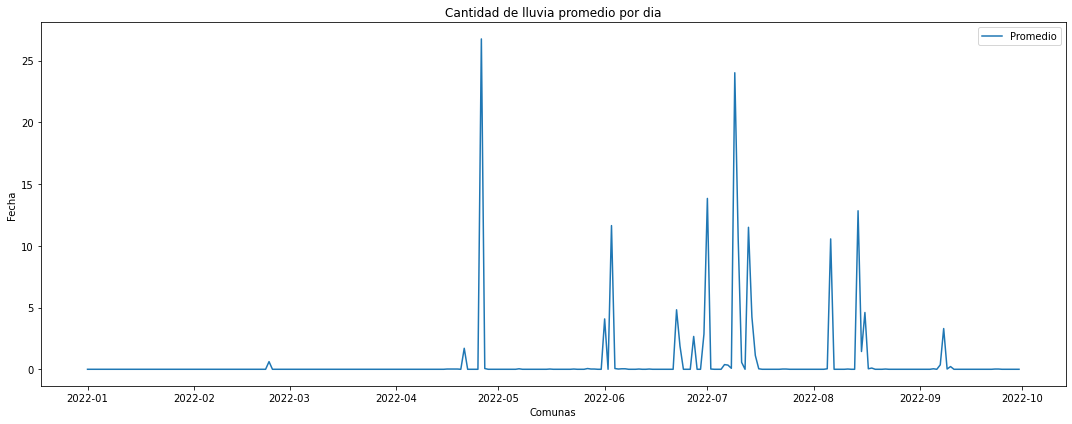

In [16]:
fig, ax = plt.subplots(figsize=(15,6))

ax.plot(df_llu["Fecha"], df_llu["promedio_estaciones"], label ="Promedio")
#ax.scatter(df_llu["Fecha"], df_llu["E. Eulogio Sanchez"])
#ax.scatter(df_llu["Fecha"], df_llu["E. Pudahuel"])
#ax.scatter(df_llu["Fecha"], df_llu["E. Quinta Normal"])
#ax.scatter(df_llu["Fecha"], df_llu["E. San Jose"])
ax.legend()
ax.set_xlabel("Comunas")
ax.set_ylabel("Fecha")
ax.set_title("Cantidad de lluvia promedio por dia")

fig.tight_layout()

Como podemos ver en el gráfico, existe una distribución estacionaria, que concentra la mayoría de las preciítaciones en invierno.
Ahora procederemos a cargar la base de temperatura obtenida a través de la Dirección Meteorológica de Chile, de las mismas estaciones de la base anterior, las cuales se consolidaron en un archivo al igual que con los datos de precipitaciones.

In [17]:
df_temp=pd.read_excel ('C:/Users/javie/Universidad/Trimestre 2/Analisis de datos/Capstone Project/Raw-DGAC-Temp/Consolidado_temp.xlsx')
df_temp.head(10)

,Fecha,E. El Paico,E. Eulogio Sanchez,E. Pudahuel,E. Quinta Normal,E. San Jose
0,2022-01-01,18.0,20.4,20.0,20.4,18.8
1,2022-01-02,18.7,20.9,20.8,21.0,19.6
2,2022-01-03,20.6,21.9,22.4,22.2,20.0
3,2022-01-04,20.9,22.1,22.6,22.8,20.7
4,2022-01-05,19.6,22.9,23.1,22.9,21.5
5,2022-01-06,18.0,22.1,20.9,21.3,20.4
6,2022-01-07,19.0,22.9,22.2,22.5,21.7
7,2022-01-08,17.9,22.5,22.1,21.9,21.6
8,2022-01-09,18.8,20.3,19.8,19.7,19.4
9,2022-01-10,19.1,21.4,21.2,21.2,20.0


Luego de cargar la base, nos fijaremos en la estructura de datos que contiene.

In [18]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Fecha               273 non-null    datetime64[ns]
 1   E. El Paico         273 non-null    object        
 2   E. Eulogio Sanchez  273 non-null    object        
 3   E. Pudahuel         273 non-null    float64       
 4   E. Quinta Normal    273 non-null    float64       
 5   E. San Jose         273 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 12.9+ KB


Podemos apreciar que no todas las estaciones tienen formato numérico, por lo que es necesario forzar este cambio.

In [19]:
df_temp['E. El Paico']=pd.to_numeric(df_temp['E. El Paico'],errors='coerce')
df_temp['E. Eulogio Sanchez']=pd.to_numeric(df_temp['E. Eulogio Sanchez'],errors='coerce')
df_temp['E. Pudahuel']=pd.to_numeric(df_temp['E. Pudahuel'],errors='coerce')
df_temp['E. Quinta Normal']=pd.to_numeric(df_temp['E. Quinta Normal'],errors='coerce')
df_temp['E. San Jose']=pd.to_numeric(df_temp['E. San Jose'],errors='coerce')
df_temp.describe()

,E. El Paico,E. Eulogio Sanchez,E. Pudahuel,E. Quinta Normal,E. San Jose
count,190.000000,260.000000,273.000000,273.000000,242.000000
mean,14.462632,14.133077,13.837729,13.740293,12.945041
std,4.050086,5.234197,5.319167,5.225643,5.453644
min,3.900000,4.700000,4.500000,4.300000,1.800000
25%,11.200000,9.600000,9.300000,9.300000,8.300000
50%,15.250000,13.750000,13.300000,13.000000,12.750000
75%,17.900000,19.200000,19.000000,18.600000,18.100000
max,21.200000,23.600000,24.400000,23.800000,22.200000


In [20]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Fecha               273 non-null    datetime64[ns]
 1   E. El Paico         190 non-null    float64       
 2   E. Eulogio Sanchez  260 non-null    float64       
 3   E. Pudahuel         273 non-null    float64       
 4   E. Quinta Normal    273 non-null    float64       
 5   E. San Jose         242 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 12.9 KB


Podemos apreciar que se hizo el cambio efectivo, por lo que procederemos a ver los datos estadísticos de esta base. Se puede ver que el promedio para todas las comunas es aproximadamente 13 y fracción.
Como ya todas las variables son del tipo correcto, procedemos a crear la variable promedio para analizar la temperatura en lo que va del año.

In [21]:
df_temp['promedio_estaciones'] = df_temp.mean(numeric_only=True, axis=1)
df_temp

,Fecha,E. El Paico,E. Eulogio Sanchez,E. Pudahuel,E. Quinta Normal,E. San Jose,promedio_estaciones
0,2022-01-01,18.0,20.4,20.0,20.4,18.8,19.52
1,2022-01-02,18.7,20.9,20.8,21.0,19.6,20.20
2,2022-01-03,20.6,21.9,22.4,22.2,20.0,21.42
3,2022-01-04,20.9,22.1,22.6,22.8,20.7,21.82
4,2022-01-05,19.6,22.9,23.1,22.9,21.5,22.00
...,...,...,...,...,...,...,...
268,2022-09-26,NaN,NaN,11.8,12.2,NaN,12.00
269,2022-09-27,NaN,NaN,14.0,13.9,NaN,13.95
270,2022-09-28,NaN,NaN,14.0,14.1,NaN,14.05
271,2022-09-29,NaN,NaN,12.1,12.9,NaN,12.50


In [22]:
#df_temp=df_temp.fillna(0) yo creo que no porque ensuciaria el data set
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Fecha                273 non-null    datetime64[ns]
 1   E. El Paico          190 non-null    float64       
 2   E. Eulogio Sanchez   260 non-null    float64       
 3   E. Pudahuel          273 non-null    float64       
 4   E. Quinta Normal     273 non-null    float64       
 5   E. San Jose          242 non-null    float64       
 6   promedio_estaciones  273 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 15.1 KB


Graficaremos la temperatura promedio por día, para visualizar su comportamiento en lo que va del año.

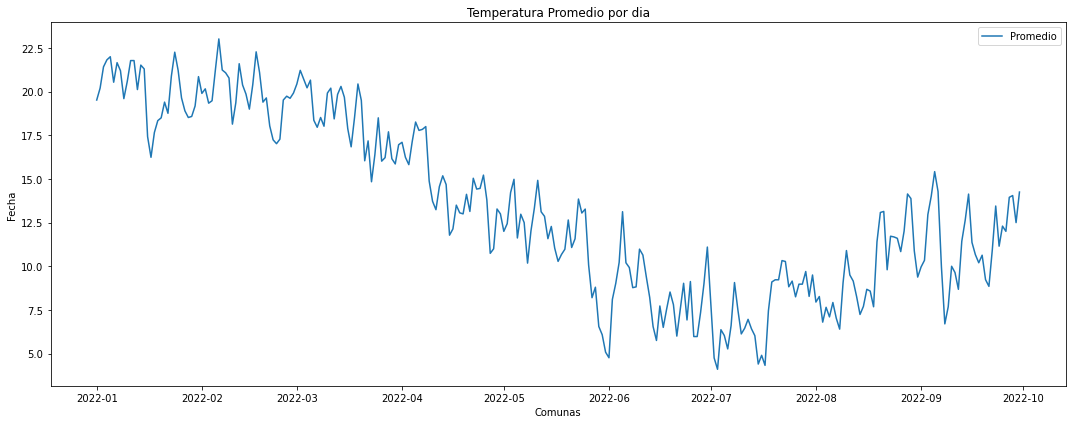

In [23]:
fig, ax = plt.subplots(figsize=(15,6))

ax.plot(df_temp["Fecha"], df_temp["promedio_estaciones"], label ="Promedio")
#ax.scatter(df_llu["Fecha"], df_llu["E. Eulogio Sanchez"])
#ax.scatter(df_llu["Fecha"], df_llu["E. Pudahuel"])
#ax.scatter(df_llu["Fecha"], df_llu["E. Quinta Normal"])
#ax.scatter(df_llu["Fecha"], df_llu["E. San Jose"])
ax.legend()
ax.set_xlabel("Comunas")
ax.set_ylabel("Fecha")
ax.set_title("Temperatura Promedio por dia")

fig.tight_layout()

No nos econtramos con muchas sorpresas respecto de la temperatura media, que sabemos responde a los cambios de estación.

Ahora cargaremos la base de servicio móvil UPTIME, que fue obtenida de manera privada y nos muestra el estado del servicio en el gran Santiago.

In [69]:
df_upt=pd.read_csv ('C:/Users/javie/Universidad/Trimestre 2/Analisis de datos/Capstone Project/Raw-Uptime/raw.uptime.20222.csv',sep=";",decimal=',')
df_upt.head(10)

,fecha,upt_3g
0,01-01-2022,93.5
1,02-01-2022,93.4
2,03-01-2022,93.2
3,04-01-2022,92.6
4,05-01-2022,92.7
5,06-01-2022,92.9
6,07-01-2022,93.3
7,08-01-2022,93.3
8,09-01-2022,93.2
9,10-01-2022,92.0


Para este caso, le daremos formato a la columna de fecha como datetime para posteriormente dejar esta columna como index de nuestro dataset.

In [70]:
df_upt = df_upt.set_index(pd.to_datetime(df_upt.fecha, format='%d-%m-%Y'))
#df_upt = df_upt.reset_index()
df_upt=df_upt.drop('fecha', axis=1)
df_upt.head()

,upt_3g
fecha,
2022-01-01,93.5
2022-01-02,93.4
2022-01-03,93.2
2022-01-04,92.6
2022-01-05,92.7


In [71]:
df_upt = df_upt.groupby(['fecha']).mean()
df_upt = df_upt[['upt_3g']].reset_index()

df_upt.head(30)

,fecha,upt_3g
0,2022-01-01,93.5
1,2022-01-02,93.4
2,2022-01-03,93.2
3,2022-01-04,92.6
4,2022-01-05,92.7
5,2022-01-06,92.9
6,2022-01-07,93.3
7,2022-01-08,93.3
8,2022-01-09,93.2
9,2022-01-10,92.0


Realizados los cambios, podemos concatenar todos nuestros dataset en uno solo utilizando como base o index la fecha.

In [72]:
df_upt['temp_media']= df_upt.fecha.map(df_temp.set_index(df_temp.Fecha)['promedio_estaciones'])
df_upt['lluvia']= df_upt.fecha.map(df_llu.set_index(df_llu.Fecha)['promedio_estaciones'])
df_upt=df_upt.fillna(0)


In [73]:
#df_upt['upt_3g']=pd.to_numeric(df_upt['upt_3g'],errors='coerce')
df_upt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   fecha       268 non-null    datetime64[ns]
 1   upt_3g      268 non-null    float64       
 2   temp_media  268 non-null    float64       
 3   lluvia      268 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 8.5 KB


Chequeamos que todo esté correcto.

In [81]:
df_upt.head(100)

,fecha,upt_3g,temp_media,lluvia
0,2022-01-01,93.5,19.52,0.0
1,2022-01-02,93.4,20.20,0.0
2,2022-01-03,93.2,21.42,0.0
3,2022-01-04,92.6,21.82,0.0
4,2022-01-05,92.7,22.00,0.0
...,...,...,...,...
95,2022-04-06,91.4,17.78,0.0
96,2022-04-07,92.2,17.84,0.0
97,2022-04-08,92.9,18.00,0.0
98,2022-04-09,92.3,14.88,0.0


A continuación, generaremos una matriz de confusión para poder observar la relación entre nuestras tres variables y detectar patrones relevantes para nuestro modelo.

array([[<AxesSubplot:xlabel='upt_3g', ylabel='upt_3g'>,
        <AxesSubplot:xlabel='temp_media', ylabel='upt_3g'>,
        <AxesSubplot:xlabel='lluvia', ylabel='upt_3g'>],
       [<AxesSubplot:xlabel='upt_3g', ylabel='temp_media'>,
        <AxesSubplot:xlabel='temp_media', ylabel='temp_media'>,
        <AxesSubplot:xlabel='lluvia', ylabel='temp_media'>],
       [<AxesSubplot:xlabel='upt_3g', ylabel='lluvia'>,
        <AxesSubplot:xlabel='temp_media', ylabel='lluvia'>,
        <AxesSubplot:xlabel='lluvia', ylabel='lluvia'>]], dtype=object)

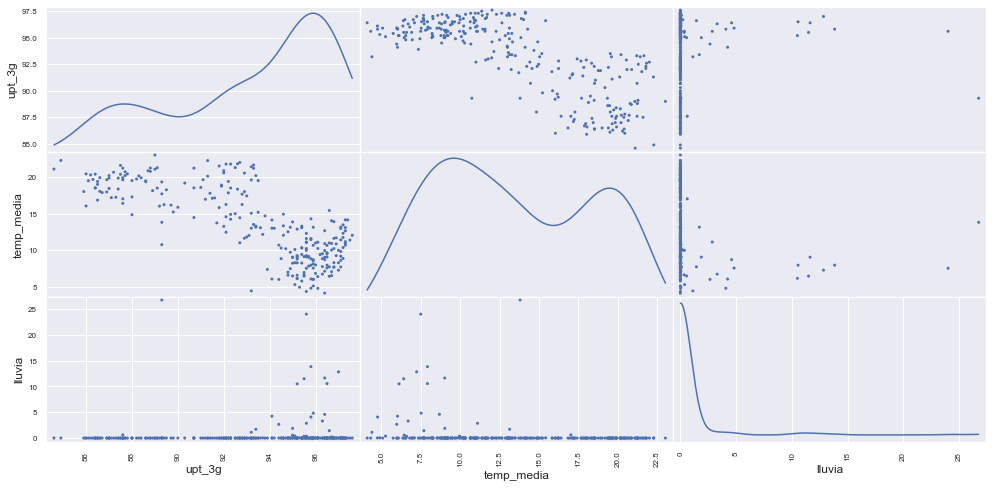

In [129]:
from pandas.plotting import scatter_matrix

scatter_matrix(df_upt, alpha=1, figsize=(15,8), diagonal='kde')

Una vez visualizadas las relaciones entre todas las variables, podemos observar datos interesantes. Uno, básico en sí pero que nos permite corroborar que nuestras relaciones se están realizando de forma correcta, es la correlación existente entre la cantidad de lluvia caída y las temperaturas bajas que se expresa de forma visual de manera evidente.

En segunda instancia, y mucho más interesante, es la tendencia que se da a la disminución del UPTIME cuando las temperaturas van al alza.

Y finalmente, la relación de UPTIME y lluvia no logra ser demasiado determinista principalmente porque los períodos de lluvia son muy cortos y poco frecuentes. Sin embargo, con los datos que tenemos podemos ver algunos indicios de cómo a mayor cantidad de agua caída el indicador se deteriora.

A continuación graficaremos las 3 variables en modo de líneas para observar el comportamiento en el tiempo.

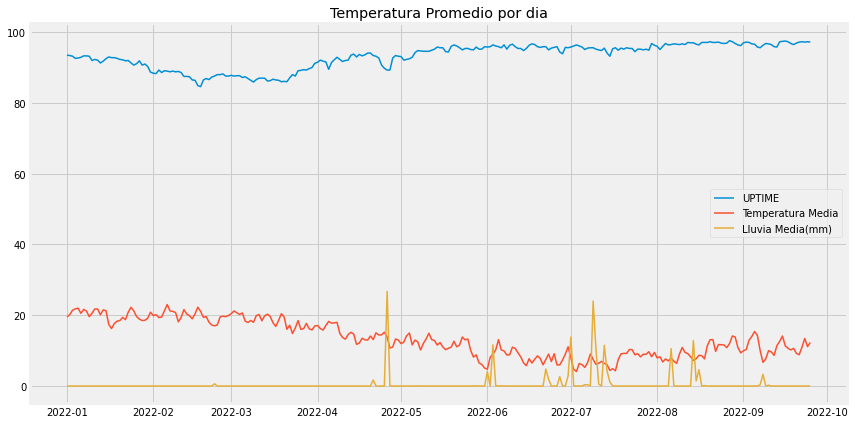

In [103]:
#df_upt = df_upt.set_index(pd.to_datetime(df_upt.fecha, format='%Y-%m-%d'))
#df_upt=df_upt.set_index('fecha')
#df_upt.plot()

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(df_upt["fecha"], df_upt["upt_3g"], label ="UPTIME")
ax.plot(df_upt["fecha"], df_upt["temp_media"], label ="Temperatura Media")
ax.plot(df_upt["fecha"], df_upt["lluvia"], label ="Lluvia Media(mm)")
#ax.scatter(df_llu["Fecha"], df_llu["E. Eulogio Sanchez"])
#ax.scatter(df_llu["Fecha"], df_llu["E. Pudahuel"])
#ax.scatter(df_llu["Fecha"], df_llu["E. Quinta Normal"])
#ax.scatter(df_llu["Fecha"], df_llu["E. San Jose"])
ax.legend()
ax.set_title("Temperatura Promedio por dia")

fig.tight_layout()


A priori podemos ver que cuando existen peaks de temperatura, baja el servicio uptime, al igual que cuando llueve una gran cantidad.

Relaciones más o meno, nuestro objetivo es poder generar un modelo predictor basándonos en las 2 variables exógeenas mencionadas, por lo que procederemos en primera instancia a formatear nuestro dataset para que se ajuste a las necesidades del modelo a implementar:

##### ForecasterAutoreg 
##### Regressor: RandomForestRegressor.


In [87]:
df_upt7 = df_upt.set_index('fecha')
df_upt7

,upt_3g,temp_media,lluvia
fecha,,,
2022-01-01,93.5,19.52,0.00
2022-01-02,93.4,20.20,0.00
2022-01-03,93.2,21.42,0.00
2022-01-04,92.6,21.82,0.00
2022-01-05,92.7,22.00,0.00
...,...,...,...
2022-09-21,97.2,8.85,0.00
2022-09-22,97.3,10.95,0.00
2022-09-23,97.2,13.45,0.02


In [88]:
df_upt7= df_upt7.sort_index().asfreq(freq='D')
df_upt7

,upt_3g,temp_media,lluvia
fecha,,,
2022-01-01,93.5,19.52,0.00
2022-01-02,93.4,20.20,0.00
2022-01-03,93.2,21.42,0.00
2022-01-04,92.6,21.82,0.00
2022-01-05,92.7,22.00,0.00
...,...,...,...
2022-09-21,97.2,8.85,0.00
2022-09-22,97.3,10.95,0.00
2022-09-23,97.2,13.45,0.02


In [89]:
#df_upt = df_upt.dropna(how='any',axis=0) 
df_upt7.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 268 entries, 2022-01-01 to 2022-09-25
Freq: D
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   upt_3g      268 non-null    float64
 1   temp_media  268 non-null    float64
 2   lluvia      268 non-null    float64
dtypes: float64(3)
memory usage: 8.4 KB


In [90]:
print(f'Número de filas con missing values: {df_upt7.isnull().any(axis=1).mean()}')

Número de filas con missing values: 0.0


Seteamos las fechas de inicio y fin en el dataset para que no nos produzca problemas con nuestra serie de tiempo, de la misma forma establecemos la frecuencia de tiempo en el dataset a diaria.

In [91]:
(df_upt7.index == pd.date_range(
                    start = df_upt7.index.min(),
                    end   = df_upt7.index.max(),
                    freq  = df_upt7.index.freq)
).all()

True

Listo el formato, dividimos nuestra base en entrenamiento y testeo. Un punto crítico es definir cuántos datos o "steps" le entregaremos a la data de testeo, y cuánto le será otorgado a la data de entrenamiento. En este caso, testearemos con los últomos 10 días y utilizaremos todo el resto del dataset como entrenamiento.

Fechas train : 2022-01-01 00:00:00 --- 2022-09-15 00:00:00  (n=258)
Fechas test  : 2022-09-16 00:00:00 --- 2022-09-25 00:00:00  (n=10)


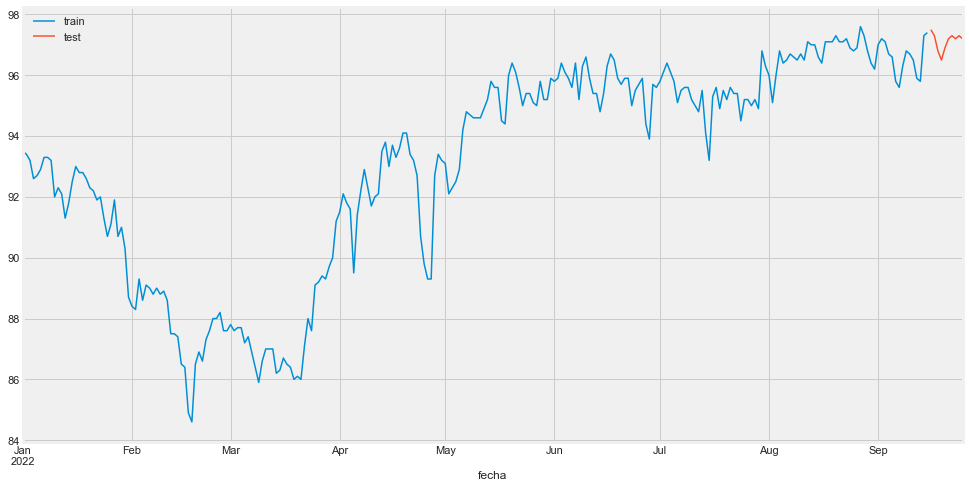

In [142]:
steps = 10
df_upt_train = df_upt7[:-steps]
df_upt_test  = df_upt7[-steps:]

print(f"Fechas train : {df_upt_train.index.min()} --- {df_upt_train.index.max()}  (n={len(df_upt_train)})")
print(f"Fechas test  : {df_upt_test.index.min()} --- {df_upt_test.index.max()}  (n={len(df_upt_test)})")

fig, ax = plt.subplots(figsize=(15, 8))
df_upt_train['upt_3g'].plot(ax=ax, label='train')
df_upt_test['upt_3g'].plot(ax=ax, label='test')
ax.legend();

Una vez revisada visualmete la separación de entrenamiento y testeo, procedemos a cargar y posteriormente ejecutar nuestro modelo predictivo entregándole las datas de entrenamiento y testeo.

Respecto del tunning del modelo no se realizan mayores modificaciones, eso si, debemos especificar las variables exógenas para que el modelo pueda considerarlas dentro de las predicciones:

##### forecaster.fit(y=df_upt_train['upt_3g'],exog = df_upt_train[['temp_media', 'lluvia']])

In [137]:
#pip install skforecast --user

In [143]:
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster


forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 6
             )

forecaster.fit(y=df_upt_train['upt_3g'],exog = df_upt_train[['temp_media', 'lluvia']])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Transformer for y: None 
Transformer for exog: None 
Window size: 6 
Included exogenous: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['temp_media', 'lluvia'] 
Training range: [Timestamp('2022-01-01 00:00:00'), Timestamp('2022-09-15 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-10-15 16:07:53 
Last fit date: 2022-10-15 16:07:53 
Skforecast version: 0.5.1 
Python version: 3.9.12 

In [144]:
df_upt_test

,upt_3g,temp_media,lluvia
fecha,,,
2022-09-16,97.5,11.366667,0.00
2022-09-17,97.3,10.666667,0.00
2022-09-18,96.8,10.200000,0.00
2022-09-19,96.5,10.633333,0.00
2022-09-20,96.9,9.233333,0.00
2022-09-21,97.2,8.850000,0.00
2022-09-22,97.3,10.950000,0.00
2022-09-23,97.2,13.450000,0.02
2022-09-24,97.3,11.150000,0.02


Una vez entrenado, realizamos una predicción que será comparada con la base de testeo. Ya que anteriormente definimos los steps en 10, nuestra predicción será también para los últimos 10 días.

In [145]:
steps = 10
predicciones = forecaster.predict(steps=steps,exog = df_upt_test[['temp_media', 'lluvia']])
predicciones.head(10)

2022-09-16    96.869
2022-09-17    96.662
2022-09-18    96.087
2022-09-19    96.253
2022-09-20    96.923
2022-09-21    97.022
2022-09-22    96.935
2022-09-23    96.838
2022-09-24    96.372
2022-09-25    96.447
Freq: D, Name: pred, dtype: float64

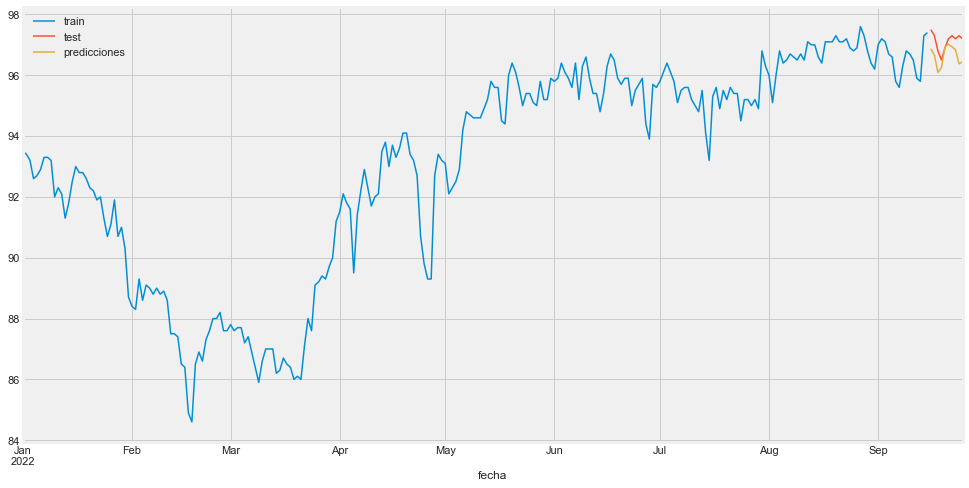

In [146]:
fig, ax = plt.subplots(figsize=(15, 8))
df_upt_train['upt_3g'].plot(ax=ax, label='train')
df_upt_test['upt_3g'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

Podemos ver que en términos de comportamiento o tendencia, nuestra predicción se ajusta a los datos reales; sin embargo, en términos de valor real parece alejarse a medida de que va aumentando la cantidad de días que se predicen. Esto puede deberse a que como ya mencionamos anteriormente, existen otros gatillantes que podrían generar cambios en las tendencias del valor de UPTIME,  y muchos de ellos no son medibles (cantidad de personal en reparación, trabajos programados en la red, incidencias masivas, cortes de suministro eléctrico, etc.).

Aún así, este parece ser un primer buen paso para poder ir incorporando cada vez más variables exógenas a nuestro modelo que  nos permitan generar predicciones mucho más acertadas, por ejemplo en el caso de la temperatura fue una sorpresa que la relación se expresara de una manera tan franca. Dicho esto, nos aprovecharemos del aumento de las temperaturas para cargar datos reales que nos permitan predecir el UPTIME a futuro, más allá del dataset que veníamos trabajando (que finalizaba el 25 de Septiembre del 2022).

Cargamos los datos:

In [131]:
df_real_test=pd.read_excel("C:/Users/javie/Universidad/Trimestre 2/Analisis de datos/Capstone Project/datos_reales_test.xlsx")
df_real_test.head(10)

,fecha,temp_media,lluvia
0,2022-09-26,12.2,0
1,2022-09-27,13.9,0
2,2022-09-28,14.1,0
3,2022-09-29,12.9,0
4,2022-09-30,14.5,0
5,2022-10-01,16.3,0
6,2022-10-02,16.1,0
7,2022-10-03,11.3,0
8,2022-10-04,11.4,0
9,2022-10-05,12.1,0


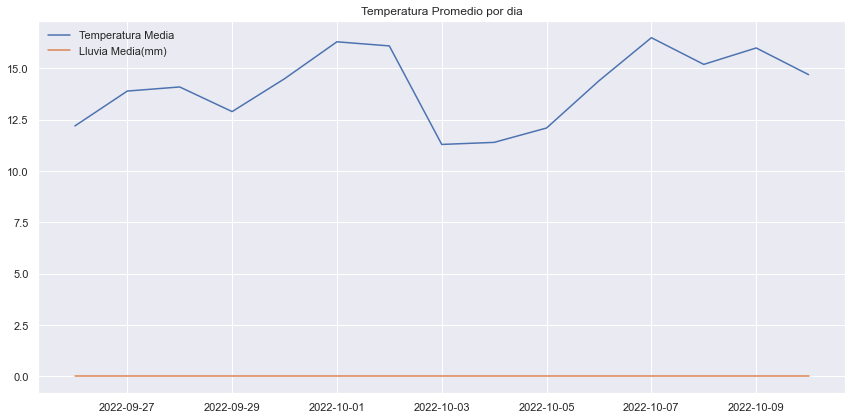

In [132]:
fig, ax = plt.subplots(figsize=(12,6))

#ax.plot(df_real_test["fecha"], df_real_test["upt_3g"], label ="UPTIME")
ax.plot(df_real_test["fecha"], df_real_test["temp_media"], label ="Temperatura Media")
ax.plot(df_real_test["fecha"], df_real_test["lluvia"], label ="Lluvia Media(mm)")
#ax.scatter(df_llu["Fecha"], df_llu["E. Eulogio Sanchez"])
#ax.scatter(df_llu["Fecha"], df_llu["E. Pudahuel"])
#ax.scatter(df_llu["Fecha"], df_llu["E. Quinta Normal"])
#ax.scatter(df_llu["Fecha"], df_llu["E. San Jose"])
ax.legend()
ax.set_title("Temperatura Promedio por dia")

fig.tight_layout()

Como vemos la acantidad de lluvia caída es 0, pero las temperaturas medias han ido al alza. Suponemos entonces que durante Octubre nuestro modelo estimará valores de UPTIME más bajos.

In [133]:
df_real_test = df_real_test.set_index('fecha')
df_real_test= df_real_test.sort_index().asfreq(freq='D')
df_real_test

,temp_media,lluvia
fecha,,
2022-09-26,12.2,0
2022-09-27,13.9,0
2022-09-28,14.1,0
2022-09-29,12.9,0
2022-09-30,14.5,0
2022-10-01,16.3,0
2022-10-02,16.1,0
2022-10-03,11.3,0
2022-10-04,11.4,0


In [134]:
steps = 15
predicciones = forecaster.predict(steps=steps,exog = df_real_test[['temp_media', 'lluvia']])
predicciones.head(30)

2022-09-16    96.892
2022-09-17    96.685
2022-09-18    96.085
2022-09-19    96.373
2022-09-20    96.962
2022-09-21    97.150
2022-09-22    97.068
2022-09-23    96.838
2022-09-24    96.378
2022-09-25    96.577
2022-09-26    96.963
2022-09-27    97.219
2022-09-28    97.116
2022-09-29    96.926
2022-09-30    96.866
Freq: D, Name: pred, dtype: float64

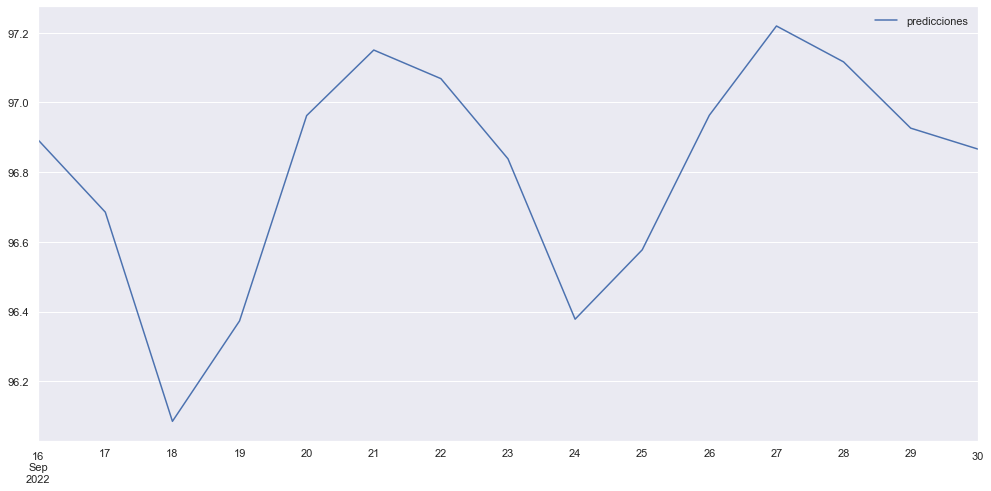

In [135]:
fig, ax = plt.subplots(figsize=(15, 8))
#df_upt_train['upt_3g'].plot(ax=ax, label='train')
#df_real_test['upt_3g'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

Acorde con nuestras suposiciones, en los siguientes 5 días se presentaría una tendencia a la baja del indicador, a saber, este comportamiento tipo diente de sierra es típico y responde a los ciclos de trabajo operativos que son al 100% de lunes a viernes, 50% sábado y nulos los domingos, por lo que no necesariamente son una consecuencia absoluta del cambio de temperatura, aún así son muy relevantes para seguir desarrollando el modelo los resultados que se han obtenido al respecto.